In [4]:
import pandas as pd
import numpy as np
from regimeSignal import regimeSignalModel
from Miscellaneous import Plot, FetchData
from pypfopt import expected_returns, risk_models
import datetime
from dateutil import relativedelta
%load_ext autoreload
%autoreload 2

In [ ]:
tickers = ["ABM", "ABC", "AlEX"]
data = FetchData().test_set(ticker=tickers, startDate="2014-01-01", endDate="2014-12-31")
#data.resample('1M').mean()
data.head()

In [ ]:
regimeSignals = pd.Series(data=[item-1 for item in np.random.choice(3, len(data.resample('1M').mean()), replace=True)],index=data.resample('1M').mean().index)
regimeSignals = regimeSignals[2:]
regimeSignals

In [ ]:
RSModel = regimeSignalModel(regimeSignals, data)

In [ ]:
RSModel.getWeights(verbose=False)

In [ ]:
RSModel.regimeWeights

In [ ]:
print(np.sum(list(wts[1].values())),np.sum(list(wts[-1].values())),np.sum(list(wts[0].values())))
wts

In [108]:
import yfinance as yf
VIX = yf.download("^VIX", start='2010-01-01', end='2011-12-31', interval='1mo')
VIX.index = pd.to_datetime(VIX.index)

[*********************100%***********************]  1 of 1 completed


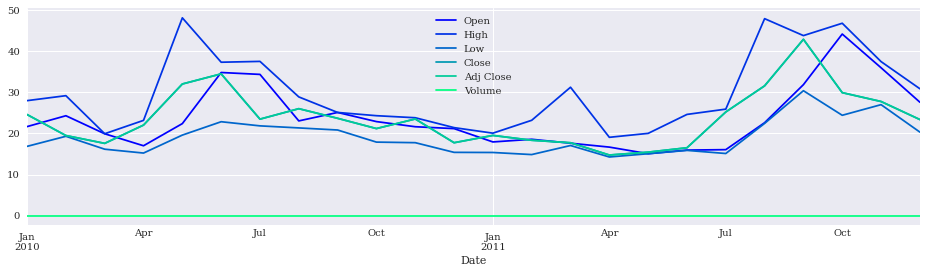

In [109]:
VIX.plot(figsize=(16,4), cmap='winter');

In [110]:
from sklearn.mixture import GaussianMixture
data = VIX['Adj Close'].values.reshape(-1, 1)
gmm = GaussianMixture(n_components=3)
gmm.fit(data)
labels = gmm.predict(data)
u_labels = np.unique(labels)

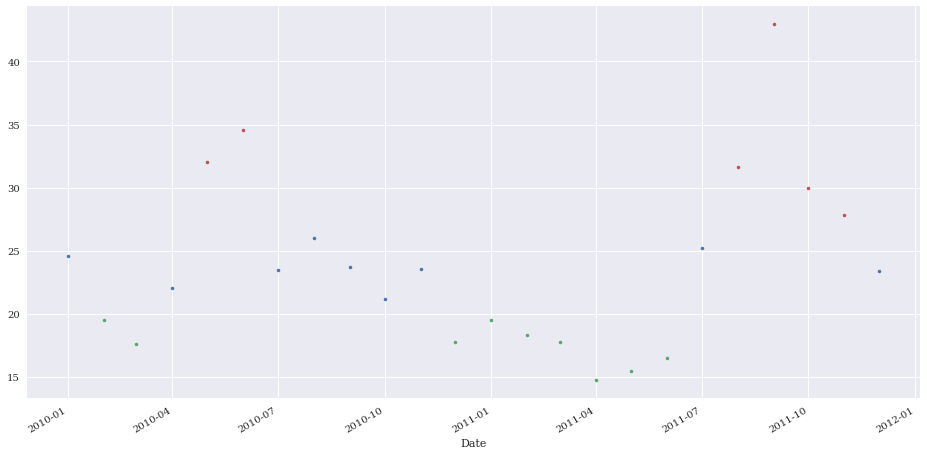

In [111]:
import matplotlib.pyplot as plt

fig, ax=  plt.subplots()

regimes_df = pd.DataFrame(data = {'VIX': VIX['Adj Close'], 'Regime': labels}, index=VIX.index)

for regimes in regimes_df.Regime.value_counts().index.tolist():
    regimes_df.VIX[regimes_df.Regime == regimes].plot(figsize=(16, 8), ax=ax, marker='.', ls="")

plt.show()

In [112]:
tickers = ["ABM", "ABC", "BRO"]
data = FetchData().test_set(ticker=tickers, startDate="2010-01-01", endDate="2011-12-31")
data.head()

...Data for ['ABM', 'ABC', 'BRO'] from 2010-01-01 to 2011-12-31 loaded successfully


ticker,ABC,ABM,BRO
date,,,
2010-01-04,26.63,21.26,18.01
2010-01-05,26.44,20.97,17.88
2010-01-06,26.19,20.97,17.72
2010-01-07,25.77,21.24,17.73
2010-01-08,26.05,21.22,17.64


In [113]:
regimeSignals = pd.Series(labels, index = VIX.index)
regimeSignals = regimeSignals[2:]
regimeSignals.head()

Date
2010-03-01    1
2010-04-01    0
2010-05-01    2
2010-06-01    2
2010-07-01    0
dtype: int32

In [119]:
model = regimeSignalModel(regimeSignals, data)

...Data for USTREASURY/YIELD.3 from 2010-01-04 to 2010-03-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-01-04 to 2010-04-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-02-01 to 2010-04-30 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-03-01 to 2010-06-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-04-01 to 2010-07-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-05-03 to 2010-07-30 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-06-01 to 2010-09-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-07-01 to 2010-10-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-08-02 to 2010-11-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-09-01 to 2010-12-01 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-10-01 to 2010-12-31 loaded successfully
...Data for USTREASURY/YIELD.3 from 2010-11-01 to 2011-02-01 loaded successfully
...Data for USTREASURY/YIELD

In [120]:
model.getWeights(verbose=True)

Max Sharpe Optimisation

 Training dates 2010-01-04 00:00:00 2010-03-01 00:00:00

 Regime Signal dates 2010-03-01 00:00:00

 Risk-free rate 0.09

 {'ABC': 0.7777777777777779, 'ABM': 0.1111111111111111, 'BRO': 0.1111111111111111} 

Custom: Maximum 15.0% volatility

 Training dates 2010-01-04 00:00:00 2010-04-01 00:00:00

 Regime Signal dates 2010-04-01 00:00:00

 Risk-free rate 0.11

 {'ABC': 0.7601452102615189, 'ABM': 0.1274549958253238, 'BRO': 0.1123997939130726} 

Minimum Volatility Optimisation

 Training dates 2010-02-01 00:00:00 2010-04-30 00:00:00

 Regime Signal dates 2010-05-01 00:00:00

 Risk-free rate 0.14

 {'ABC': 0.3333333333333334, 'ABM': 0.3333333333333334, 'BRO': 0.3333333333333334} 

Minimum Volatility Optimisation

 Training dates 2010-03-01 00:00:00 2010-06-01 00:00:00

 Regime Signal dates 2010-06-01 00:00:00

 Risk-free rate 0.16

 {'ABC': 0.3705714762950188, 'ABM': 0.1111111111111111, 'BRO': 0.5183174125938701} 

Custom: Maximum 15.0% volatility

 Training dates 2

In [121]:
model.weightsList

{0: [{'ABC': 0.7601452102615189,
   'ABM': 0.1274549958253238,
   'BRO': 0.1123997939130726},
  {'ABC': 0.3987938882183361,
   'ABM': 0.1111111111111111,
   'BRO': 0.4900950006705527},
  {'ABC': 0.3836558996109062,
   'ABM': 0.1111111111111111,
   'BRO': 0.5052329892779828},
  {'ABC': 0.3762598252754034,
   'ABM': 0.1111111111111111,
   'BRO': 0.5126290636134855},
  {'ABC': 0.3720875837491038,
   'ABM': 0.1544063057067788,
   'BRO': 0.4735061105441173},
  {'ABC': 0.386796337527946,
   'ABM': 0.1111111111111111,
   'BRO': 0.5020925513609429},
  {'ABC': 0.7777777777378957,
   'ABM': 0.1111111111267904,
   'BRO': 0.1111111111353316},
  {'ABC': 0.7777777777777778,
   'ABM': 0.1111111111111111,
   'BRO': 0.1111111111111111}],
 1: [{'ABC': 0.7777777777777779,
   'ABM': 0.1111111111111111,
   'BRO': 0.1111111111111111},
  {'ABC': 0.1660825357828014,
   'ABM': 0.1213735558813464,
   'BRO': 0.7125439083358522},
  {'ABC': 0.1827915461826023,
   'ABM': 0.3456656405353722,
   'BRO': 0.471542813282